In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


READ ME

This file is used to make train-test split for the inhibitor dataset

- temporal: keep the more recent 30% for validation, and use the older 70% for training
- cluster split: keep the 30% less similar molecules for validation, train on the 70% that are closer to each other (how good is the generalization of the model? )

MCL - Temporal

In [10]:
df_raw_mcl = pd.read_csv('../../data_preparation/inhibitors/mcl/mcl1_raw.csv')


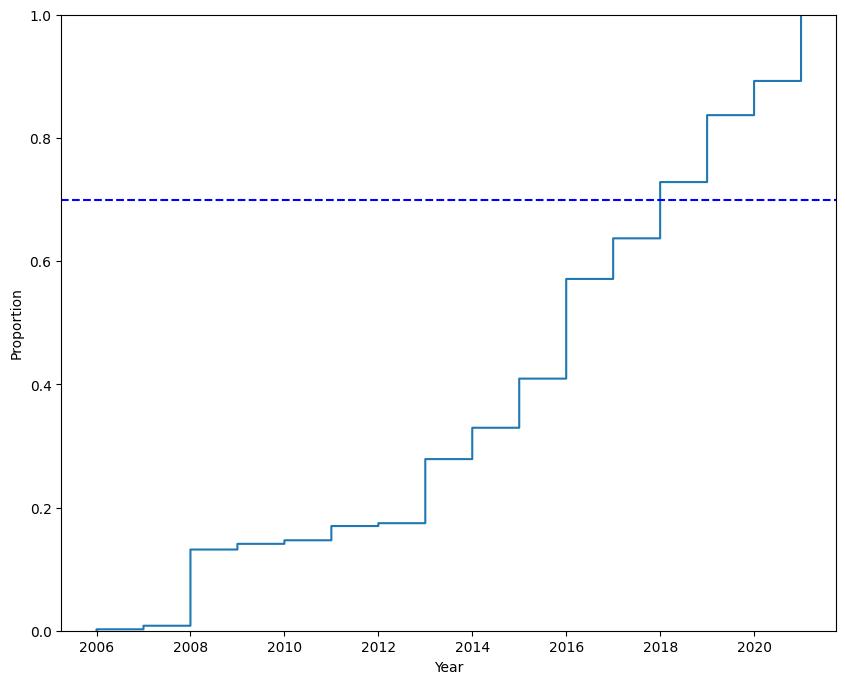

In [11]:
df_raw_mcl['Year'] = df_raw_mcl['Year'].astype(int)

plt.figure(figsize=(10, 8))
ecdf_plot = sns.ecdfplot(data=df_raw_mcl, x="Year", stat='proportion')

plt.axhline(y=0.7, color='blue', linestyle='--', label='Horizontal Line at y=0.7')
plt.show()

In [12]:
df_mcl = df_raw_mcl[['SMILES','InChIKey','connectivity','pchembl_value_Mean','Year']]
df_mcl = df_mcl.rename(columns={'connectivity':'inchi_connectivity'})


In [13]:
mcl_test = df_mcl[df_mcl['Year'] >= 2019]
mcl_test = mcl_test.reset_index(drop=True)
        
mcl_train = df_mcl[df_mcl['Year'] < 2019]
mcl_train = mcl_train.reset_index(drop=True)


In [14]:
print(f'All: {len(df_mcl)}')
print(f'Test: {len(mcl_test)}')
perc = len(mcl_test) / len(df_mcl)
print(f'Percentage: {perc}')

All: 865
Test: 235
Percentage: 0.27167630057803466


In [15]:
mcl_test.to_csv('splitting/mcl_temporal_test.csv', index=True)
mcl_train.to_csv('splitting/mcl_temporal_train.csv', index=True)

BCL - Temporal

In [16]:
df_raw_bcl = pd.read_csv('../../data_preparation/inhibitors/bcl/bcl2_raw.csv')

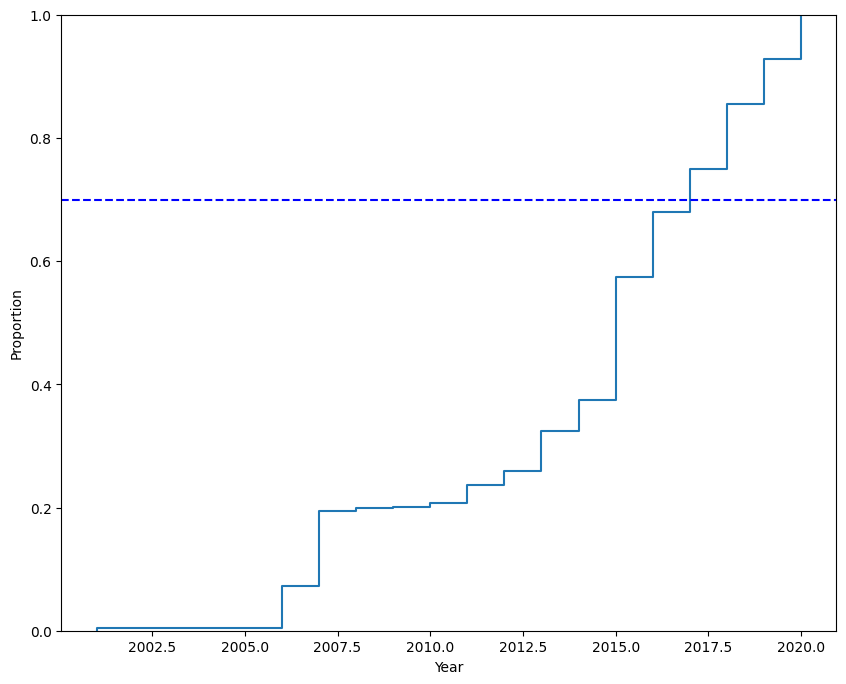

In [17]:
df_raw_bcl['Year'] = df_raw_bcl['Year'].astype(int)

plt.figure(figsize=(10, 8))
ecdf_plot = sns.ecdfplot(data=df_raw_bcl, x="Year", stat='proportion')

plt.axhline(y=0.7, color='blue', linestyle='--', label='Horizontal Line at y=0.7')
plt.show()

In [18]:
df_bcl = df_raw_bcl[['SMILES','InChIKey','connectivity','pchembl_value_Mean','Year']]
df_bcl = df_bcl.rename(columns={'connectivity':'inchi_connectivity'})


In [19]:
bcl_test = df_bcl[df_bcl['Year'] >= 2017]
bcl_test = bcl_test.reset_index(drop=True)
        
bcl_train = df_bcl[df_bcl['Year'] < 2017]
bcl_train = bcl_train.reset_index(drop=True)

In [20]:
print(f'All: {len(df_bcl)}')
print(f'Test: {len(bcl_test)}')
perc = len(bcl_test) / len(df_bcl)
print(f'Percentage: {perc}')

All: 428
Test: 137
Percentage: 0.32009345794392524


In [21]:
bcl_test.to_csv('splitting/bcl_temporal_test.csv', index=True)
bcl_train.to_csv('splitting/bcl_temporal_train.csv', index=True)

In [23]:
df_bcl.head()

,SMILES,InChIKey,inchi_connectivity,pchembl_value_Mean,Year
0,Cc1cc(=O)c2c(o1)c(CC(C)C)c(O)c(O)c2O,ADNKLAAIRXDEOP-UHFFFAOYSA-N,ADNKLAAIRXDEOP,6.14,2007
1,N#CC1=C(O)c2cccc3c(Sc4ccc(Br)cc4)ccc(c23)C1=NC...,AEAIKBHAZFBIFT-UHFFFAOYSA-N,AEAIKBHAZFBIFT,5.99,2020
2,COC1(CC(C)C)CCN(c2ccc(C(=O)NS(=O)(=O)c3ccc(NC(...,AGGPTAKEWABCFB-UHFFFAOYSA-N,AGGPTAKEWABCFB,7.25,2007
3,O=C1c2c(cccc2)C(=O)c2c1cc(O)c(O)c2O,AHKDJQYHVWSRLT-UHFFFAOYSA-N,AHKDJQYHVWSRLT,5.88,2012
4,CC1=CC(C=C(Cl)c2ccc(C(=O)O)cc2)C2(C(=O)O)C=CC(...,AIPCKDBTGKGQEY-UHFFFAOYSA-N,AIPCKDBTGKGQEY,6.43,2018


Mcl - Cluster

In [28]:
!python clustering_split.py -i ../../data_preparation/inhibitors/mcl/mcl_molecules.csv -o splitting/mcl_cluster_split.csv -b True -f 0.7 -s 1

 Input: ../../data_preparation/inhibitors/mcl/mcl_molecules.csv
 Training file name: splitting/mcl_cluster_split.csv
Fraction to train: 0.70
 Split Clusters: True
 0-based smiles column number: 1
Hierarchical clustering is selected. Dataset size is: 865
Adjusting test to train ratio. It may split one cluster
Clustering finished. Training set size is 607, Test set size is 258, Fraction 0.30


In [30]:
mcl_cluster = pd.read_csv('splitting/mcl_cluster_split.csv')
mcl_cluster = mcl_cluster.drop(columns='Unnamed: 0')
mcl_cluster = mcl_cluster.rename(columns={'connectivity':'inchi_connectivity'})
mcl_cluster.tail()

,SMILES,InChIKey,inchi_connectivity,pchembl_value_Mean,Class,ClusterNo,MolCount,Group
860,O=[N+]([O-])c1ccc2[nH]c(O)c(N=NC(=S)Nc3cnccc3)...,XOUABXCGDZWGCY-UHFFFAOYSA-N,XOUABXCGDZWGCY,5.20,Non-inhibitor,104,1,Testing
861,COc1c(I)cc(C=O)c2c1cccc2,YZBDTDDJLMKGKE-UHFFFAOYSA-N,YZBDTDDJLMKGKE,6.26,Non-inhibitor,105,1,Testing
862,CC1CCc2c(C1)sc(Nc1nc3c(cccc3F)s1)c2C(N)=O,ZTMGOFZWXPCDQQ-UHFFFAOYSA-N,ZTMGOFZWXPCDQQ,5.42,Non-inhibitor,106,1,Testing
863,Cc1nc2cc(-c3c(-n4c(C)ccc4C)scc3)nn2c(O)c1,ZUEIANXAXZFNTB-UHFFFAOYSA-N,ZUEIANXAXZFNTB,5.30,Non-inhibitor,107,1,Testing
864,c1cc(C2Nc3cccc4cccc(c34)N2)cnc1,ZUOLBTXPELTJQQ-UHFFFAOYSA-N,ZUOLBTXPELTJQQ,5.02,Non-inhibitor,108,1,Testing


In [31]:
mcl_cluster_train = mcl_cluster[mcl_cluster['Group'] == "Training"]
mcl_cluster_test = mcl_cluster[mcl_cluster['Group'] == "Testing"]


In [32]:
mcl_cluster_train.to_csv('splitting/mcl_cluster_train.csv', index=True)
mcl_cluster_test.to_csv('splitting/mcl_cluster_test.csv', index=True)

BCL - Cluster

In [33]:
!python clustering_split.py -i ../../data_preparation/inhibitors/bcl/bcl_molecules.csv -o splitting/bcl_cluster_split.csv -b True -f 0.7 -s 1

 Input: ../../data_preparation/inhibitors/bcl/bcl_molecules.csv
 Training file name: splitting/bcl_cluster_split.csv
Fraction to train: 0.70
 Split Clusters: True
 0-based smiles column number: 1
Hierarchical clustering is selected. Dataset size is: 428
Adjusting test to train ratio. It may split one cluster
Clustering finished. Training set size is 301, Test set size is 127, Fraction 0.30


In [34]:
bcl_cluster = pd.read_csv('splitting/bcl_cluster_split.csv')
bcl_cluster = bcl_cluster.drop(columns='Unnamed: 0')
bcl_cluster = bcl_cluster.rename(columns={'connectivity':'inchi_connectivity'})
bcl_cluster.tail()

,SMILES,InChIKey,inchi_connectivity,pchembl_value_Mean,Class,ClusterNo,MolCount,Group
423,COc1ccc2c(c1)CCc1cc(OC)ccc1[N+]([O-])=[N+]2[O-],PSEWIQFVVLQNNL-UHFFFAOYSA-N,PSEWIQFVVLQNNL,5.19,Non-inhibitor,49,1,Testing
424,O=C(O)c1cc2c(cccc2)n1S(=O)(=O)c1ccc(OCc2cccc(C...,QDHAZAAJSGGQDF-UHFFFAOYSA-N,QDHAZAAJSGGQDF,5.44,Non-inhibitor,50,1,Testing
425,CCOc1c(N=Nc2c(O)n(-c3nc(-c4ccccc4)cs3)nc2C)cccc1,UBZKIJYXDHHDFN-UHFFFAOYSA-N,UBZKIJYXDHHDFN,5.52,Non-inhibitor,51,1,Testing
426,CCOC(=O)C1=C(C)N=c2sc(=Cc3cn(Cc4ccc(-c5ccccc5)...,UXLHUPGETZEDBZ-UHFFFAOYSA-N,UXLHUPGETZEDBZ,6.28,Non-inhibitor,52,1,Testing
427,O=C(O)c1csc(-c2ccc3CCCC(=NNc4nc5c(cccc5)s4)c3c...,VQBHQKNPDJBYMG-UHFFFAOYSA-N,VQBHQKNPDJBYMG,5.30,Non-inhibitor,53,1,Testing


In [35]:
bcl_cluster_train = bcl_cluster[bcl_cluster['Group'] == "Training"]
bcl_cluster_test = bcl_cluster[bcl_cluster['Group'] == "Testing"]

In [36]:
bcl_cluster_train.to_csv('splitting//bcl_cluster_train.csv', index=True)
bcl_cluster_test.to_csv('splitting/bcl_cluster_test.csv', index=True)